# Airbnb Price Prediction Data Science Engg. Methods & Tools 

## Report Summary
1. **Importing Python Libraries/Statements**
2. **Reading the dataset**
3. **Analysing the Original Dataset**
    - Understanding Basic information and stats about the dataset
    - Identifying Null values and irrelevant data
    
4. **Pre-processing & Data Exploration**<br>
    
    - Deleting irrelevant columns.
    - Cleaning individual columns.
    - Removing  Null values.
    - Histogram for all features
    - Correlation
    - Analyzing Categorical Features
    
5. **Data Encoding and Analysis** 
    - Label encoding 

6.  **Train, Test, Split the model**
    - Linear Regression
    - Random Forest
    - Hypertuning - GridSearchCV, RandomizedSearchCV
7. **Conclusion**
    - Comparison of algorithms and its accuracy
    - Conclusion summary

**Importing Python Libraries and Statements**

In [5]:
import pandas as pd
import numpy as np
import warnings
import time
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from scipy.stats import norm
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import ast
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt



warnings.filterwarnings('ignore')

**Reading the dataset**

In [6]:
df = pd.read_csv("/Users/kritisonal/Downloads/train.csv")

Data set link:
https://www.kaggle.com/datasets/stevezhenghp/airbnb-price-prediction?select=train.csv

In [7]:
print(df)

             id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Ai

**Analysing the original data set**

In [8]:
type(df)

pandas.core.frame.DataFrame

**Shape of Data Set**

In [9]:
df.shape

(74111, 29)

**Name of Columns**

In [10]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

**Basic Info**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

**Basic Stats**

In [12]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


**Column datatypes**

In [13]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [14]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


**Pre-Processing and Data Exploration**

**Adding column  price which converts the log price to original price**

In [15]:
df['price'] = np.exp(df['log_price'])
df = df.drop(['log_price'], axis=1)
print('Printing DF log column transformation.\n\n')
print ('Shape: ' + str(df.shape))
print(df.head())

Printing DF log column transformation.


Shape: (74111, 29)
         id property_type        room_type  \
0   6901257     Apartment  Entire home/apt   
1   6304928     Apartment  Entire home/apt   
2   7919400     Apartment  Entire home/apt   
3  13418779         House  Entire home/apt   
4   3808709     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  ...   longitude  \
0  Real Bed              strict          True  NYC  ...  -73.991617   
1  Real Bed              strict   

**Checking for null values**

In [16]:
df.isna().sum()

id                            0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
price                         0
dtype: int64

**Calculating null % for each column**

In [17]:
colna = {"column_name": [], "percent_missing_values": []}
for col in df.columns:
    colna["column_name"].append(col)
    colna["percent_missing_values"].append(
        100 * (df[col].isna().sum() / len(df[col])))

NA_df = pd.DataFrame(colna)
NA_df.sort_values(["percent_missing_values"], inplace=True, ascending=False)

print(NA_df)

               column_name  percent_missing_values
14      host_response_rate               24.691341
23    review_scores_rating               22.563452
11            first_review               21.405729
17             last_review               21.355804
24           thumbnail_url               11.086074
21           neighbourhood                9.272578
25                 zipcode                1.303450
5                bathrooms                0.269865
15              host_since                0.253674
12    host_has_profile_pic                0.253674
13  host_identity_verified                0.253674
27                    beds                0.176762
26                bedrooms                0.122789
19               longitude                0.000000
22       number_of_reviews                0.000000
20                    name                0.000000
18                latitude                0.000000
0                       id                0.000000
16        instant_bookable     

**Null Value Treatment: Pie chart representation of columns versus null%**

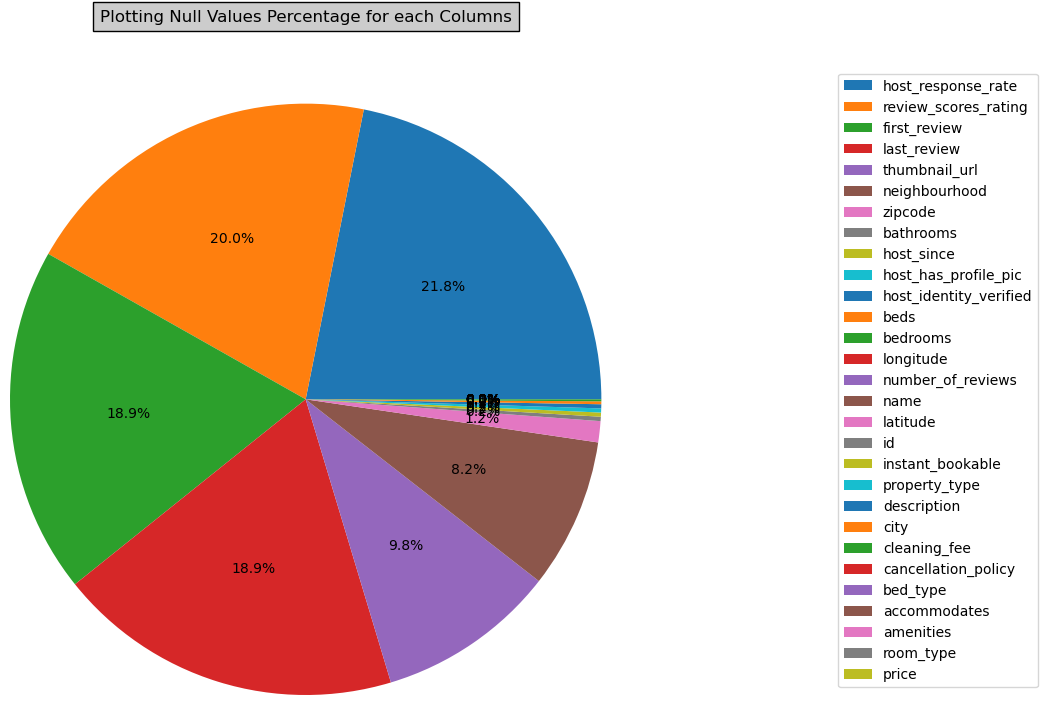

In [18]:
plt.title("Plotting Null Values Percentage for each Columns",
          bbox={
              'facecolor': '0.8',
              'pad': 5
          },
          y=1.5)

pieChart = plt.pie(NA_df['percent_missing_values'],
                   radius=2.0,
                   autopct='%1.1f%%')
plt.legend(labels=NA_df['column_name'], bbox_to_anchor=(2.5, 1.4))

<AxesSubplot:xlabel='column_name'>

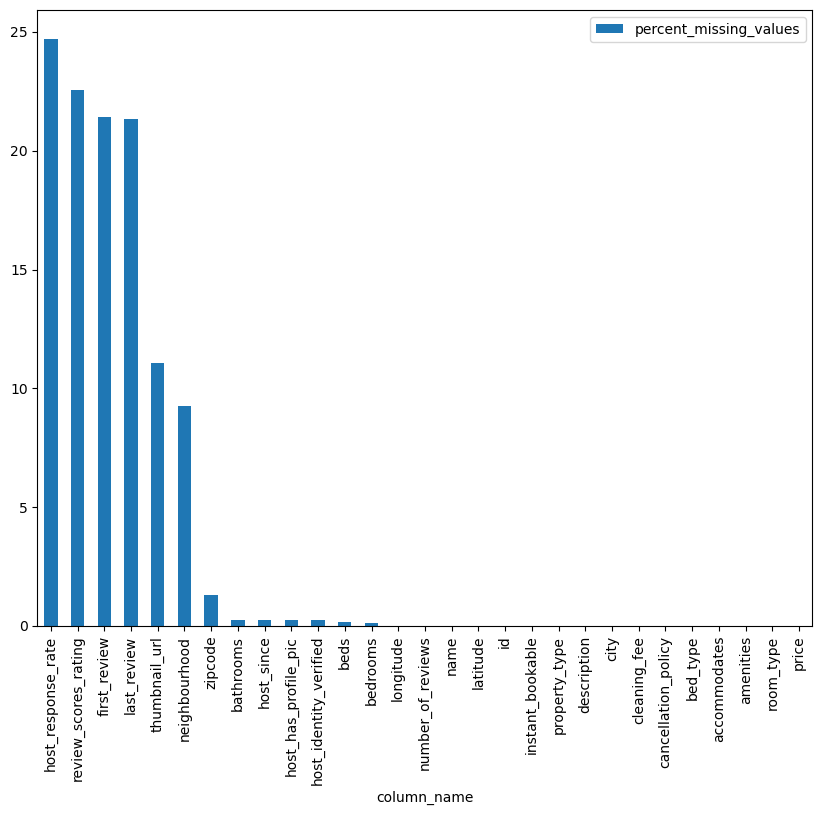

In [19]:

NA_df.plot(x="column_name", y="percent_missing_values", kind="bar", figsize=(10,8))

Interpretation: Some columns such as host_response_rate,review_score_rating, have more null values

**Dropping columns which are irrelevant in prediction also we will drop columns where null values are more than 20%**

In [20]:
df = df.drop(['latitude', 'longitude', 'thumbnail_url',\
              'first_review', 'last_review', 'description',\
              'id', 'host_response_rate', 'name', 'neighbourhood',\
              'zipcode', 'host_since'], axis=1)
print ('Printing df after dropping columns\n\n')
print ('Shape: ' + str(df.shape))
print (df.head())

Printing df after dropping columns


Shape: (74111, 17)
  property_type        room_type  \
0     Apartment  Entire home/apt   
1     Apartment  Entire home/apt   
2     Apartment  Entire home/apt   
3         House  Entire home/apt   
4     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city host_has_profile_pic  \
0  Real Bed              strict          True  NYC                    t   
1  Real Bed              strict          True  NYC                    t   
2  Real Bed    

Since review_score_rating is a useful column in our prediction model, despite having a high null value it is not being dropped, we will be imputing the values.

In [21]:
# Handle Amenities - Count
def count_amenities(amenities_str):
    try:
        remove_chars = '"{}'
        translation_table = str.maketrans('', '', remove_chars)
        amenities_str = amenities_str.translate(translation_table)
        return len(set(amenities_str.split(',')))
    except (ValueError, SyntaxError):
        return 0  # Handle cases where the string is not a valid set

# Apply the function to create the 'Number of amenities' column
df['Number of amenities'] = df['amenities'].apply(count_amenities)

# Drop the original 'Amenities' column if needed
df.drop('amenities', axis=1, inplace=True)

The column Amenities, consists the list of all the facilities provided at the particular Airbnb property. For that handling this column we applied a function to create a number of amenities provided, instead of the list so that we can use it better in our prediction model.

In [22]:
print(df.head())

  property_type        room_type  accommodates  bathrooms  bed_type  \
0     Apartment  Entire home/apt             3        1.0  Real Bed   
1     Apartment  Entire home/apt             7        1.0  Real Bed   
2     Apartment  Entire home/apt             5        1.0  Real Bed   
3         House  Entire home/apt             4        1.0  Real Bed   
4     Apartment  Entire home/apt             2        1.0  Real Bed   

  cancellation_policy  cleaning_fee city host_has_profile_pic  \
0              strict          True  NYC                    t   
1              strict          True  NYC                    t   
2            moderate          True  NYC                    t   
3            flexible          True   SF                    t   
4            moderate          True   DC                    t   

  host_identity_verified instant_bookable  number_of_reviews  \
0                      t                f                  2   
1                      f                t             

**Imputing NaN**

In [23]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
print ('Printing df after imputing.\n\n')
print ('Shape: ' + str(df.shape))
print (df.head())
print ('\n\n')

Printing df after imputing.


Shape: (74111, 17)
  property_type        room_type  accommodates  bathrooms  bed_type  \
0     Apartment  Entire home/apt           3.0        1.0  Real Bed   
1     Apartment  Entire home/apt           7.0        1.0  Real Bed   
2     Apartment  Entire home/apt           5.0        1.0  Real Bed   
3         House  Entire home/apt           4.0        1.0  Real Bed   
4     Apartment  Entire home/apt           2.0        1.0  Real Bed   

  cancellation_policy  cleaning_fee city host_has_profile_pic  \
0              strict          True  NYC                    t   
1              strict          True  NYC                    t   
2            moderate          True  NYC                    t   
3            flexible          True   SF                    t   
4            moderate          True   DC                    t   

  host_identity_verified instant_bookable  number_of_reviews  \
0                      t                f                2.0   
1    

**Now we will be removing Outliers** 

In [24]:
# 2. Remove outliers.
z_scores = stats.zscore(df.select_dtypes(include=['int64', 'float64']), axis=1)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]
df.reset_index(inplace = True, drop = True)
print ('Printing df after removing outliers.\n\n')
print ('Shape: ' + str(df.shape))
print (df.head())
print ('\n\n')

Printing df after removing outliers.


Shape: (74111, 17)
  property_type        room_type  accommodates  bathrooms  bed_type  \
0     Apartment  Entire home/apt           3.0        1.0  Real Bed   
1     Apartment  Entire home/apt           7.0        1.0  Real Bed   
2     Apartment  Entire home/apt           5.0        1.0  Real Bed   
3         House  Entire home/apt           4.0        1.0  Real Bed   
4     Apartment  Entire home/apt           2.0        1.0  Real Bed   

  cancellation_policy  cleaning_fee city host_has_profile_pic  \
0              strict          True  NYC                    t   
1              strict          True  NYC                    t   
2            moderate          True  NYC                    t   
3            flexible          True   SF                    t   
4            moderate          True   DC                    t   

  host_identity_verified instant_bookable  number_of_reviews  \
0                      t                f                2.0

**Basic Info of Cleaned data**

In [25]:
df.info()
print("\n" ,df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           74111 non-null  object 
 1   room_type               74111 non-null  object 
 2   accommodates            74111 non-null  float64
 3   bathrooms               74111 non-null  float64
 4   bed_type                74111 non-null  object 
 5   cancellation_policy     74111 non-null  object 
 6   cleaning_fee            74111 non-null  bool   
 7   city                    74111 non-null  object 
 8   host_has_profile_pic    74111 non-null  object 
 9   host_identity_verified  74111 non-null  object 
 10  instant_bookable        74111 non-null  object 
 11  number_of_reviews       74111 non-null  float64
 12  review_scores_rating    74111 non-null  float64
 13  bedrooms                74111 non-null  float64
 14  beds                    74111 non-null

In [26]:
df.isna().sum()

property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
price                     0
Number of amenities       0
dtype: int64

In [27]:
df.shape

(74111, 17)

### Data Distribution using Histogram

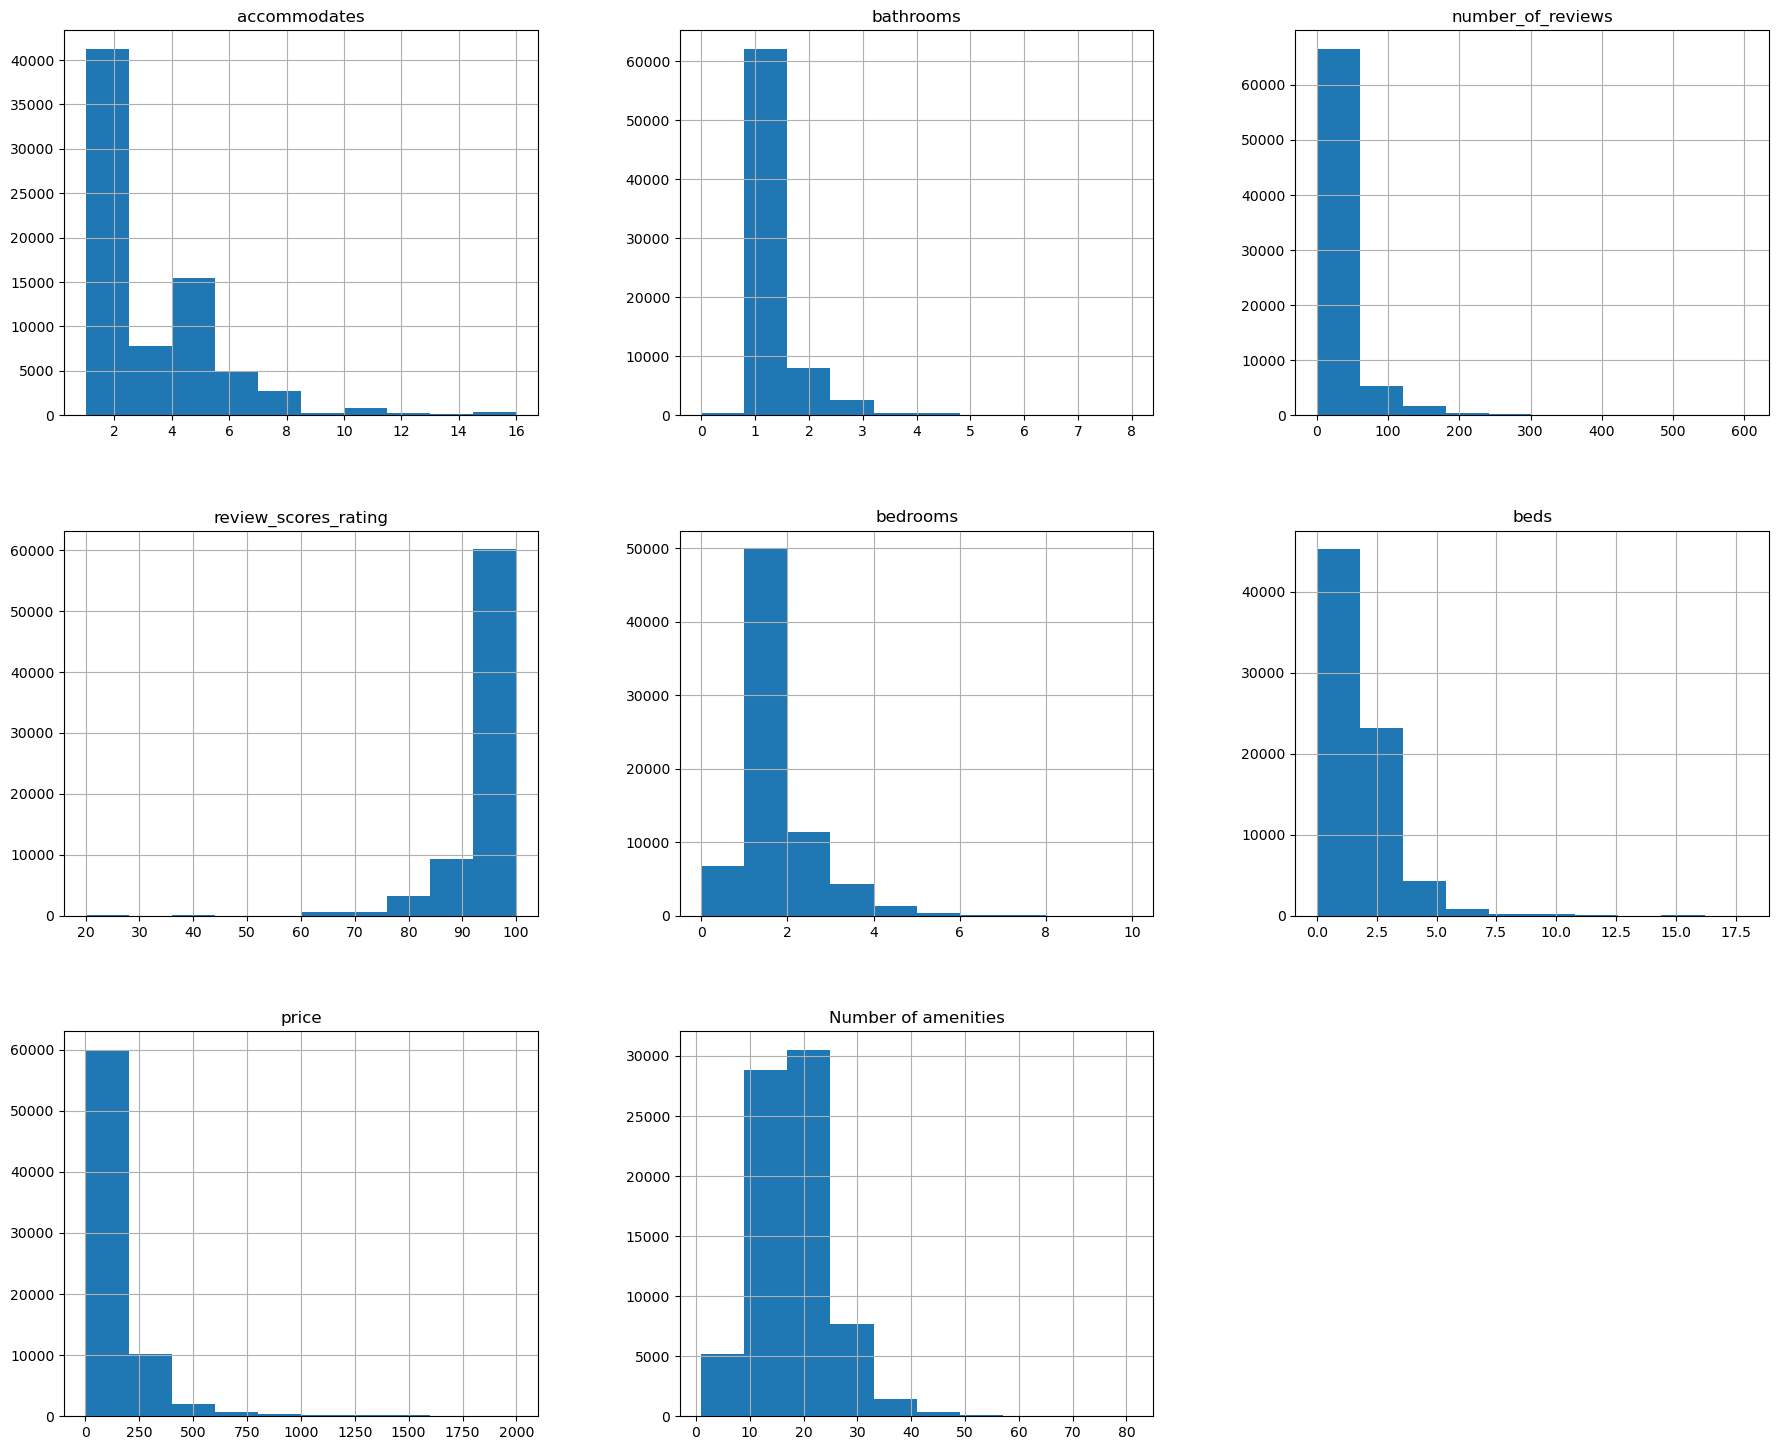

In [28]:
df.hist( figsize = (22, 18) )

plt.show()

**Data Representation using Box Plot**

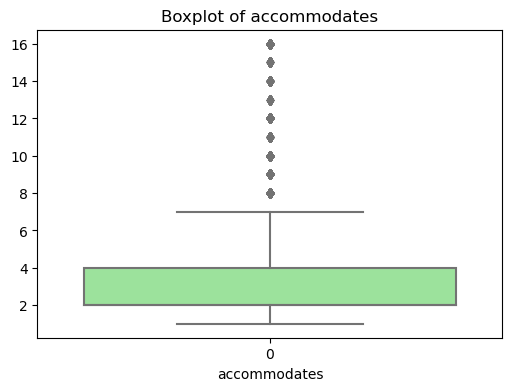

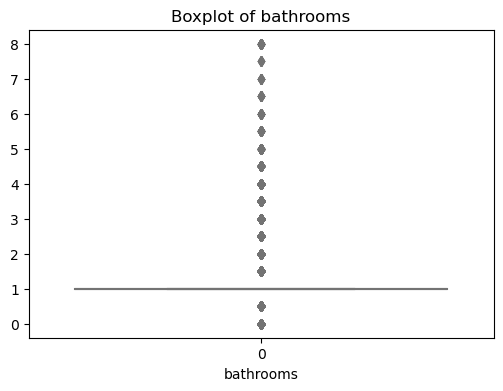

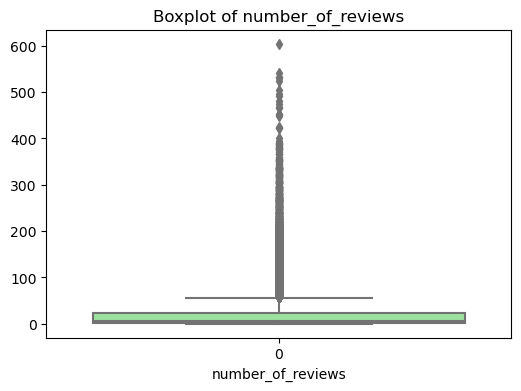

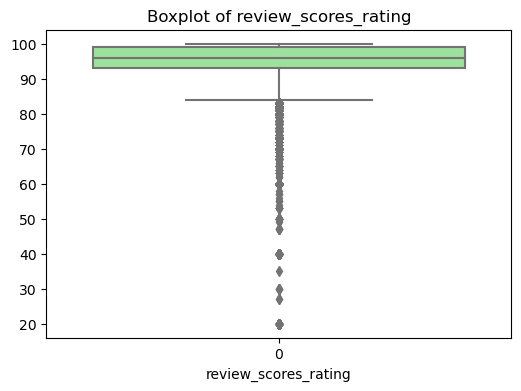

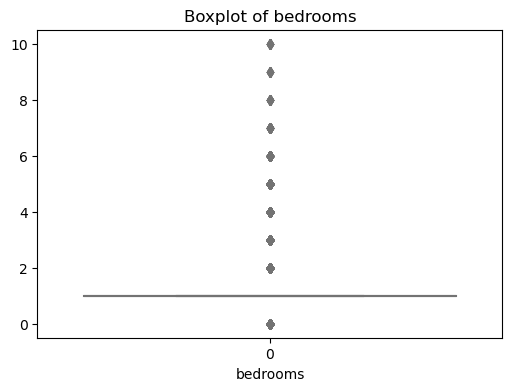

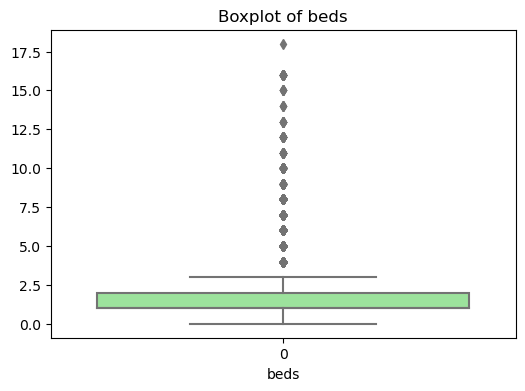

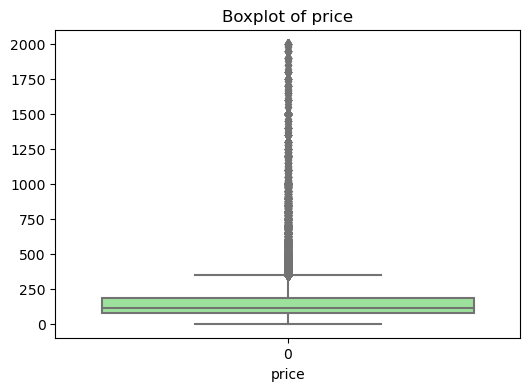

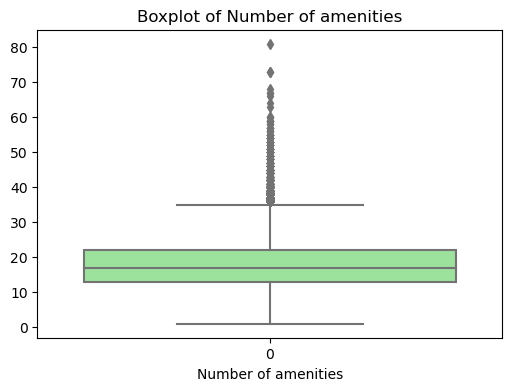

In [29]:
numerical_columns = df.select_dtypes(include=['float64'])

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

**Correlation Matrix**

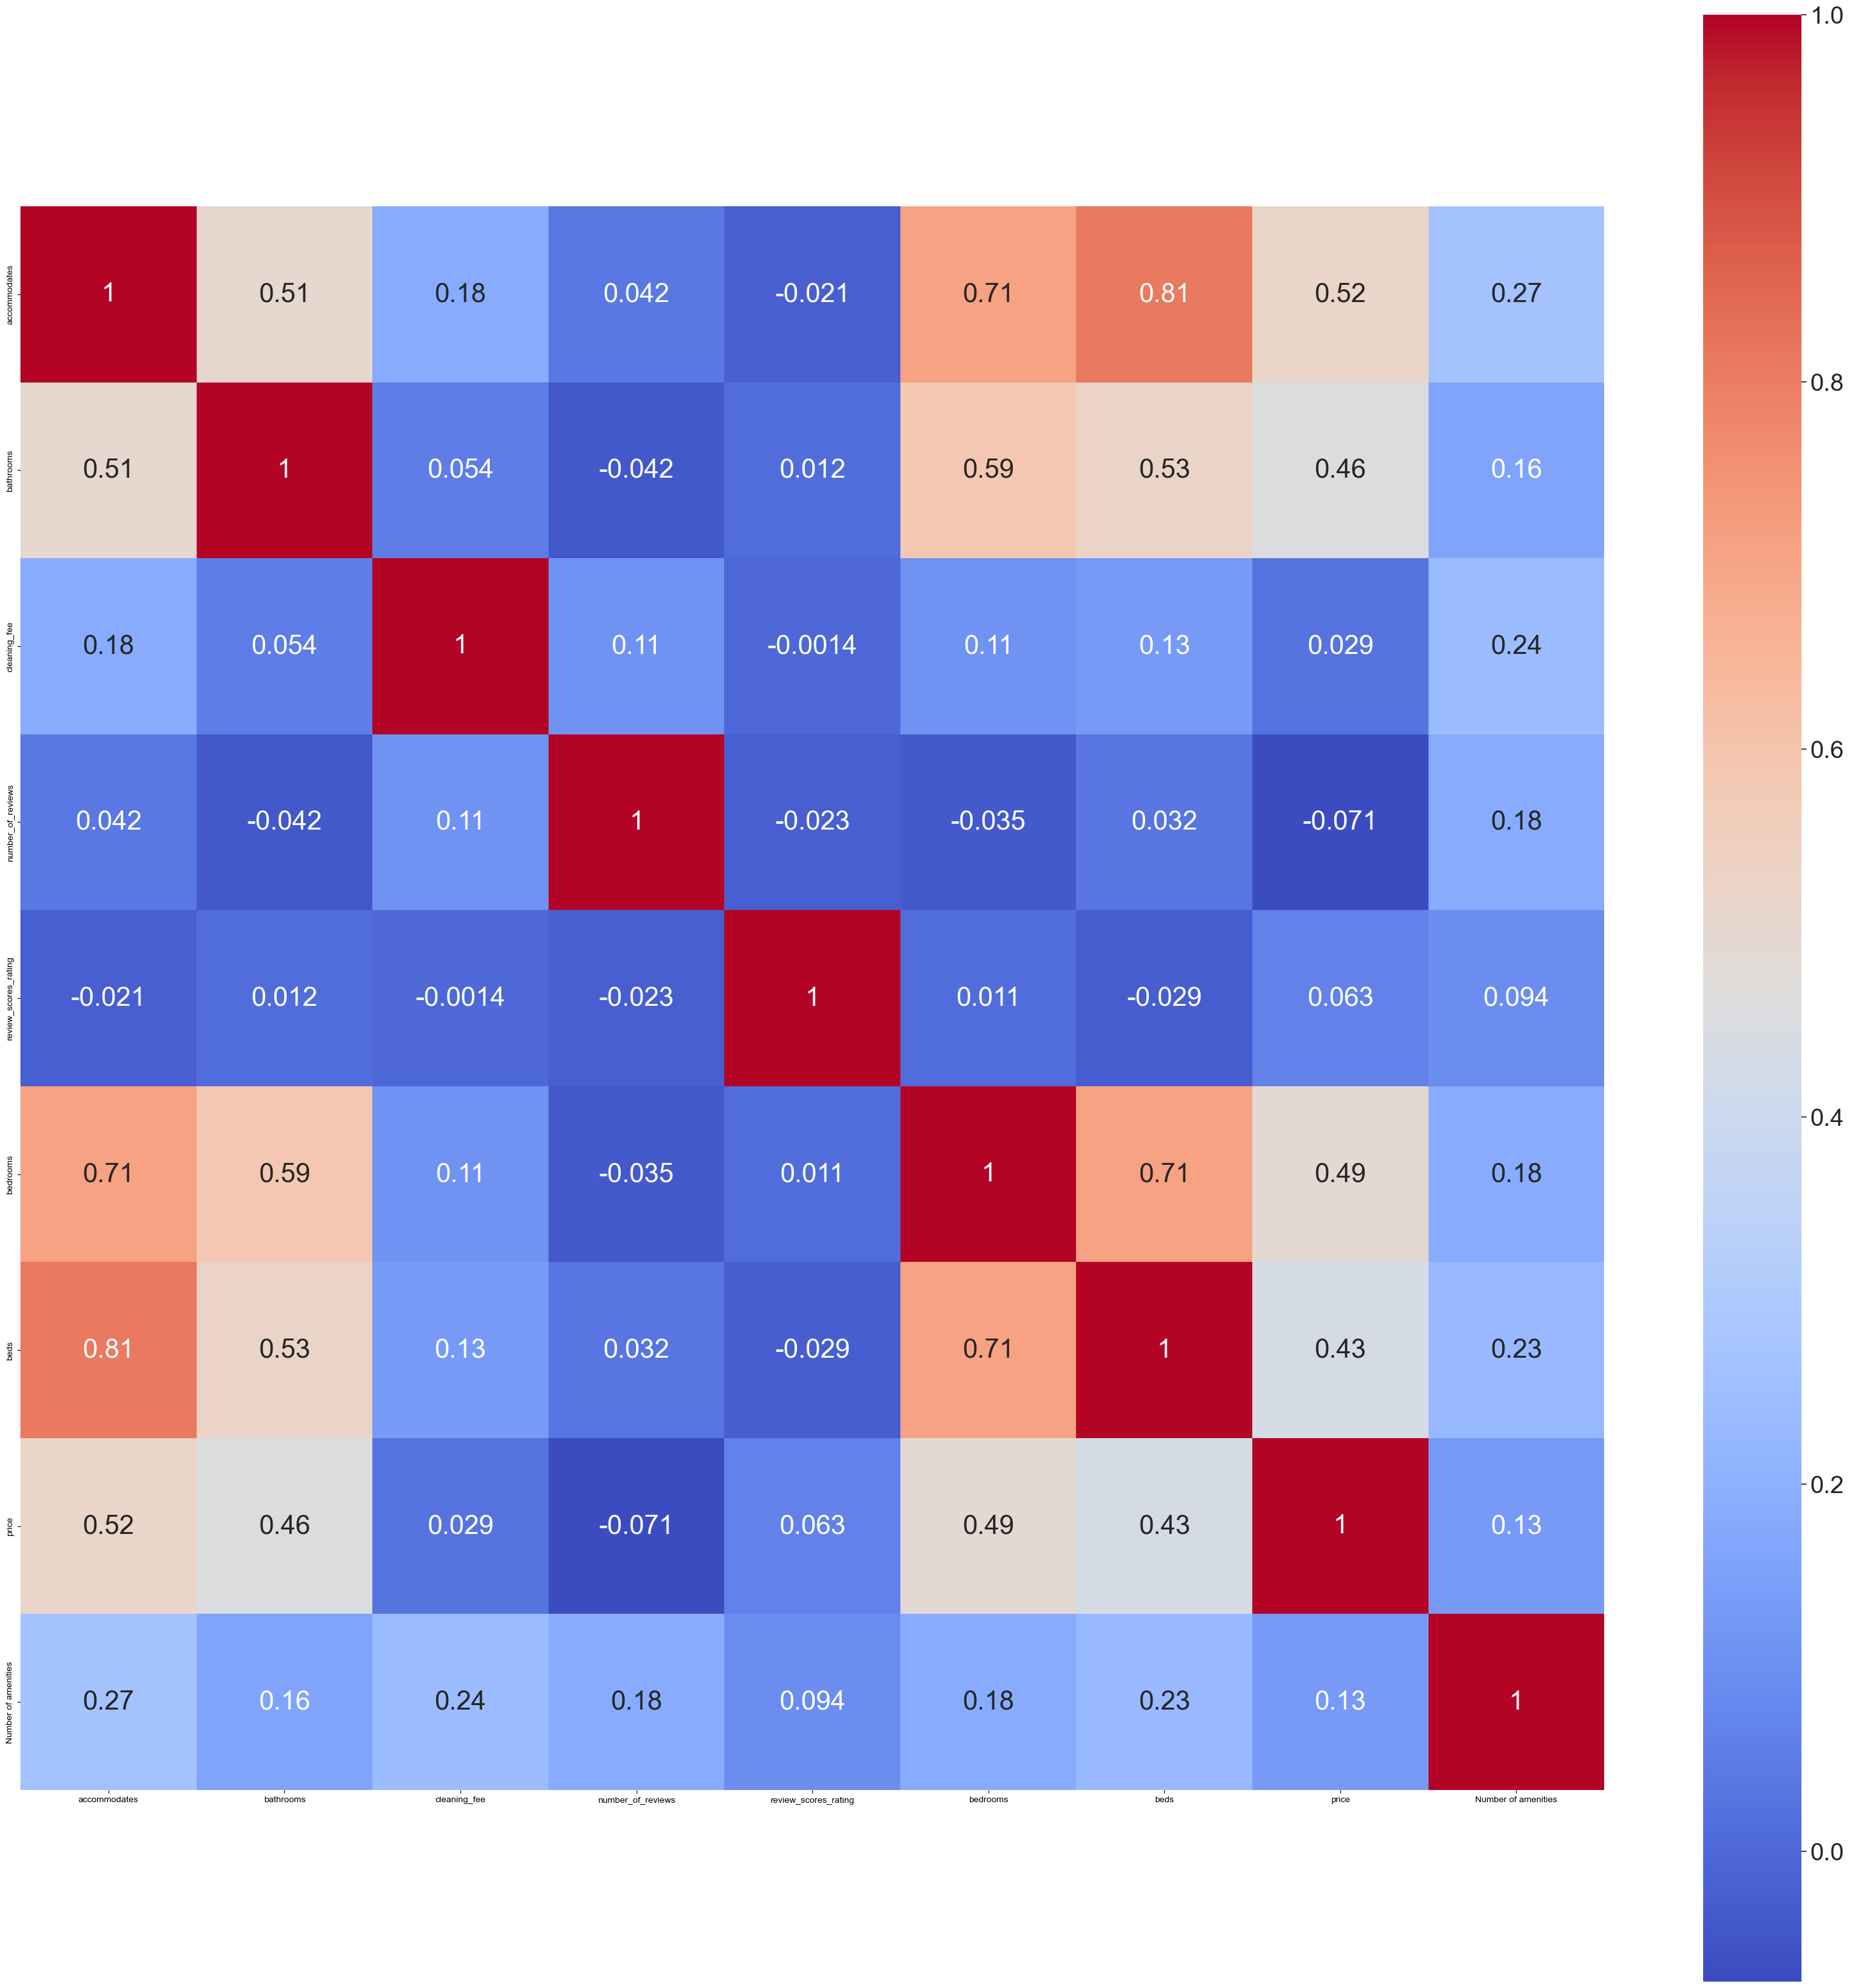

In [30]:
corr_mat = df.corr()
fig = plt.subplots (figsize = (40,40))
sns.set (font_scale = 2.5)
sns.heatmap (corr_mat, square = True, cbar = True,cmap='coolwarm', annot = True, annot_kws = {'size': 30})
plt.show ()

From the correlation heatmap diagram, it is quite obvious that the price is correlated with number of accomadations,bathrooms,bedrooms and beds review_score_rating,cleaning_fee and number of amenities. A point which can be noted is number of reviews is in negative implying properties receiving bad reviews.



In [31]:
corr_mat['price'].sort_values(ascending = False)

price                   1.000000
accommodates            0.519326
bedrooms                0.494401
bathrooms               0.459084
beds                    0.433033
Number of amenities     0.132028
review_scores_rating    0.062933
cleaning_fee            0.028529
number_of_reviews      -0.070956
Name: price, dtype: float64

**Analysing Categorical features**

In [32]:
def categorical_valcount(feature):
    print(df[feature].value_counts())
    fig, ax = plt.subplots( figsize = (30,5) )
    sns.countplot(x=feature, ax=ax, data=df)
    plt.show()

NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: city, dtype: int64


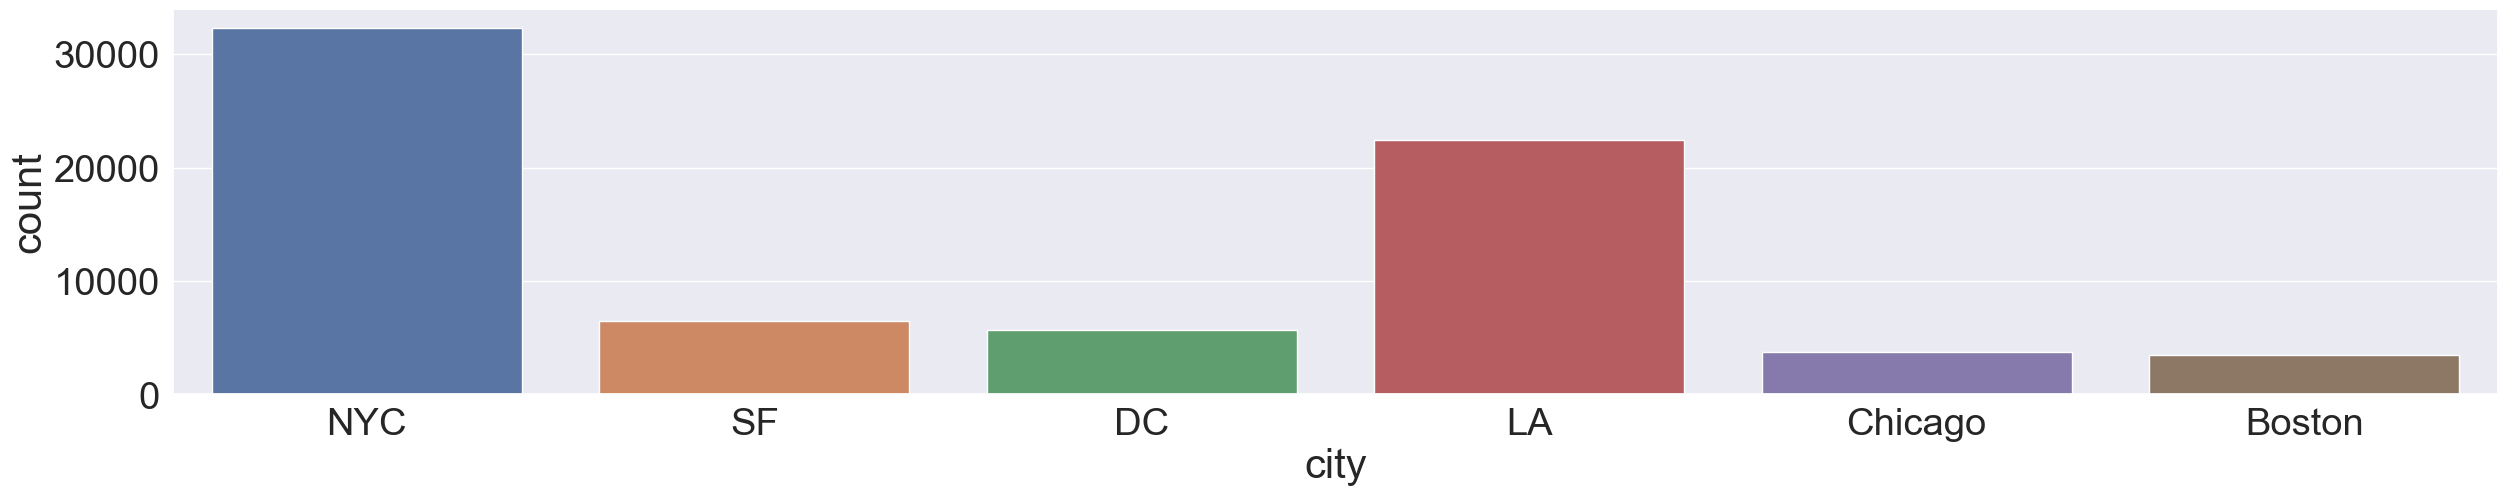

In [33]:
categorical_valcount("city")

strict             32374
flexible           22545
moderate           19063
super_strict_30      112
super_strict_60       17
Name: cancellation_policy, dtype: int64


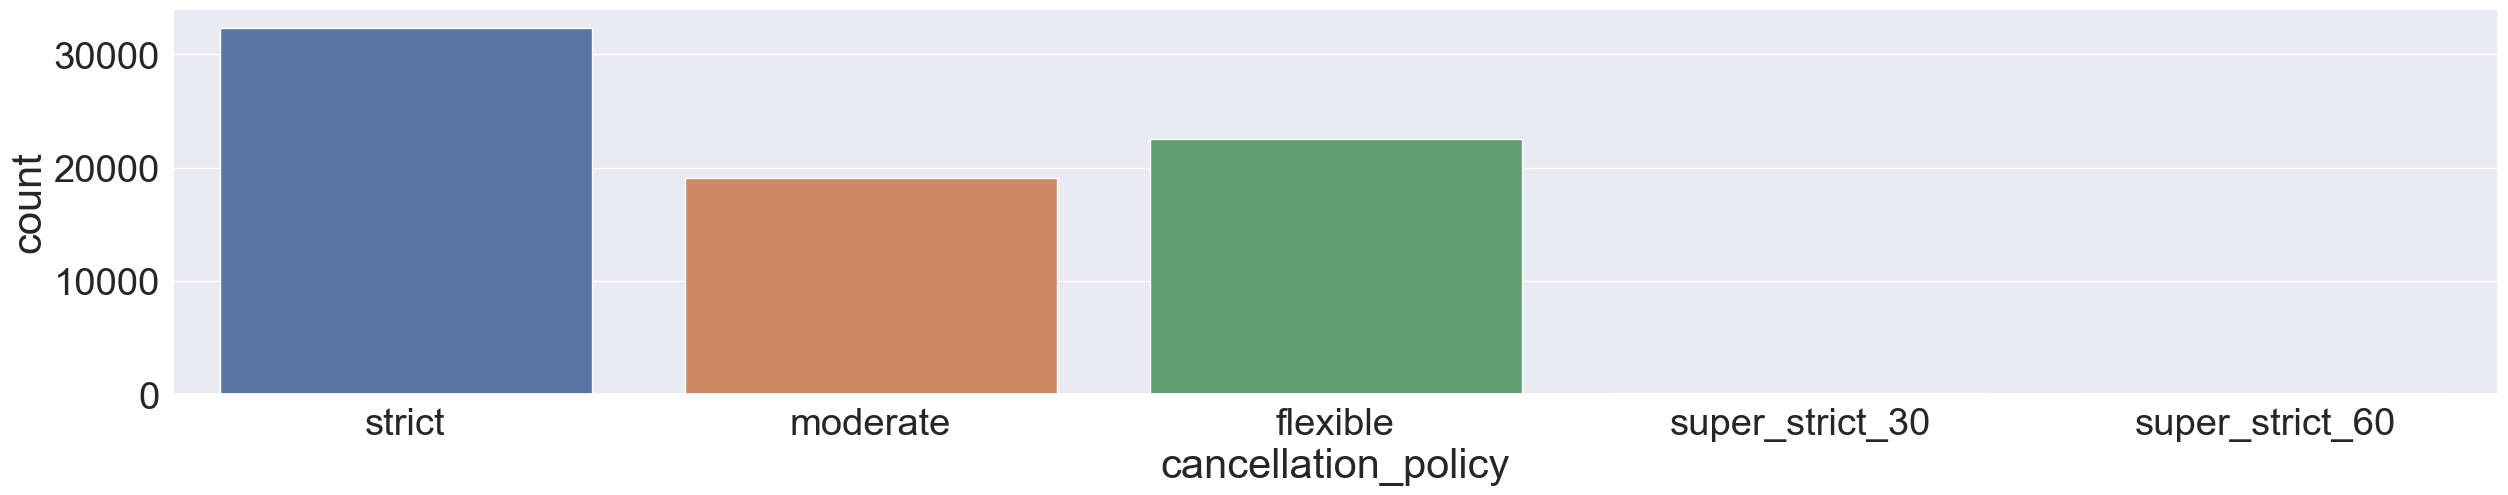

In [34]:
categorical_valcount("cancellation_policy")

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: property_type,

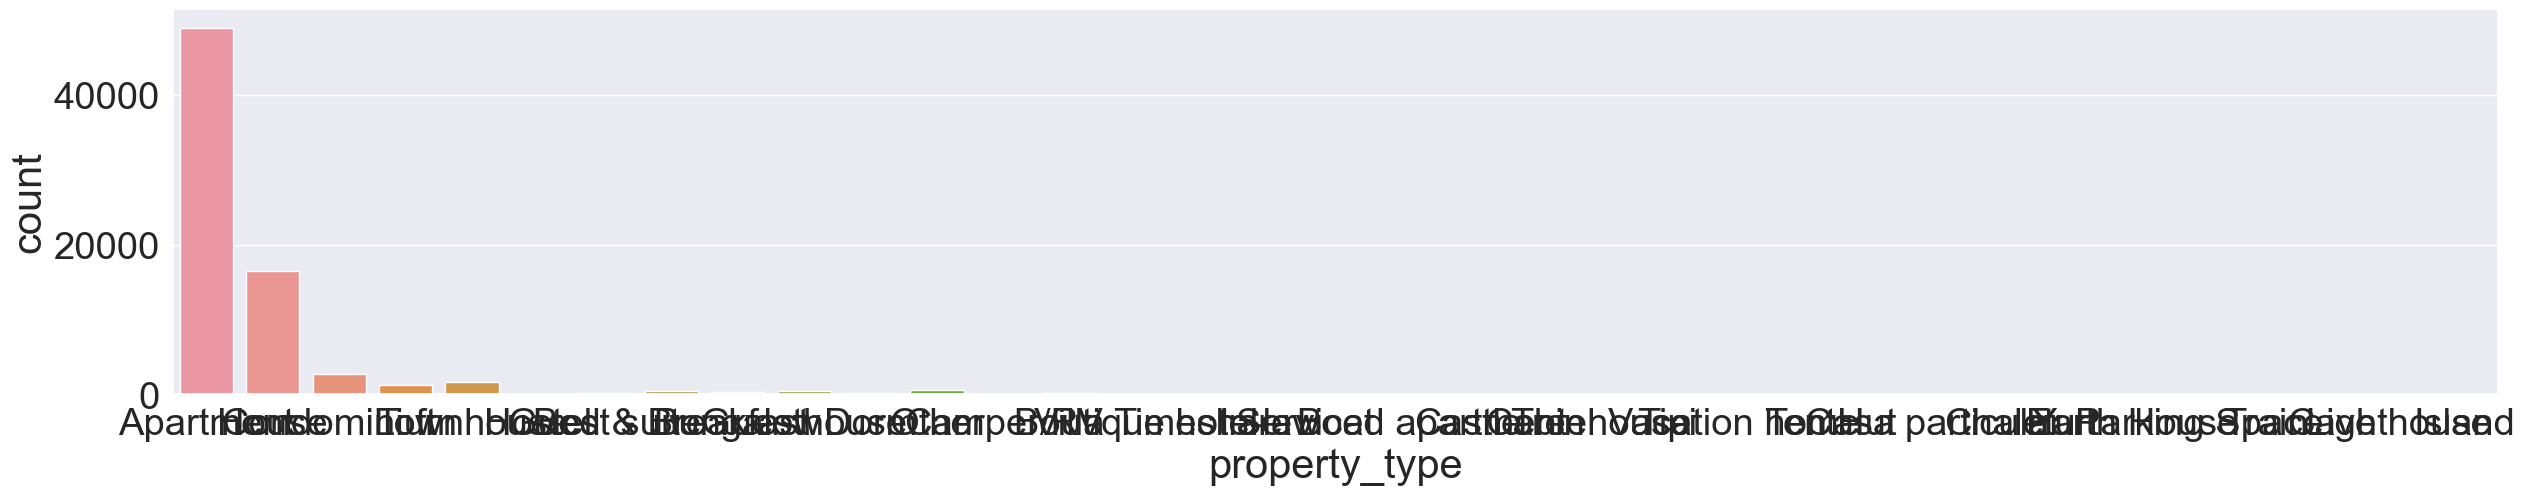

In [35]:
categorical_valcount("property_type")

Entire home/apt    41310
Private room       30638
Shared room         2163
Name: room_type, dtype: int64


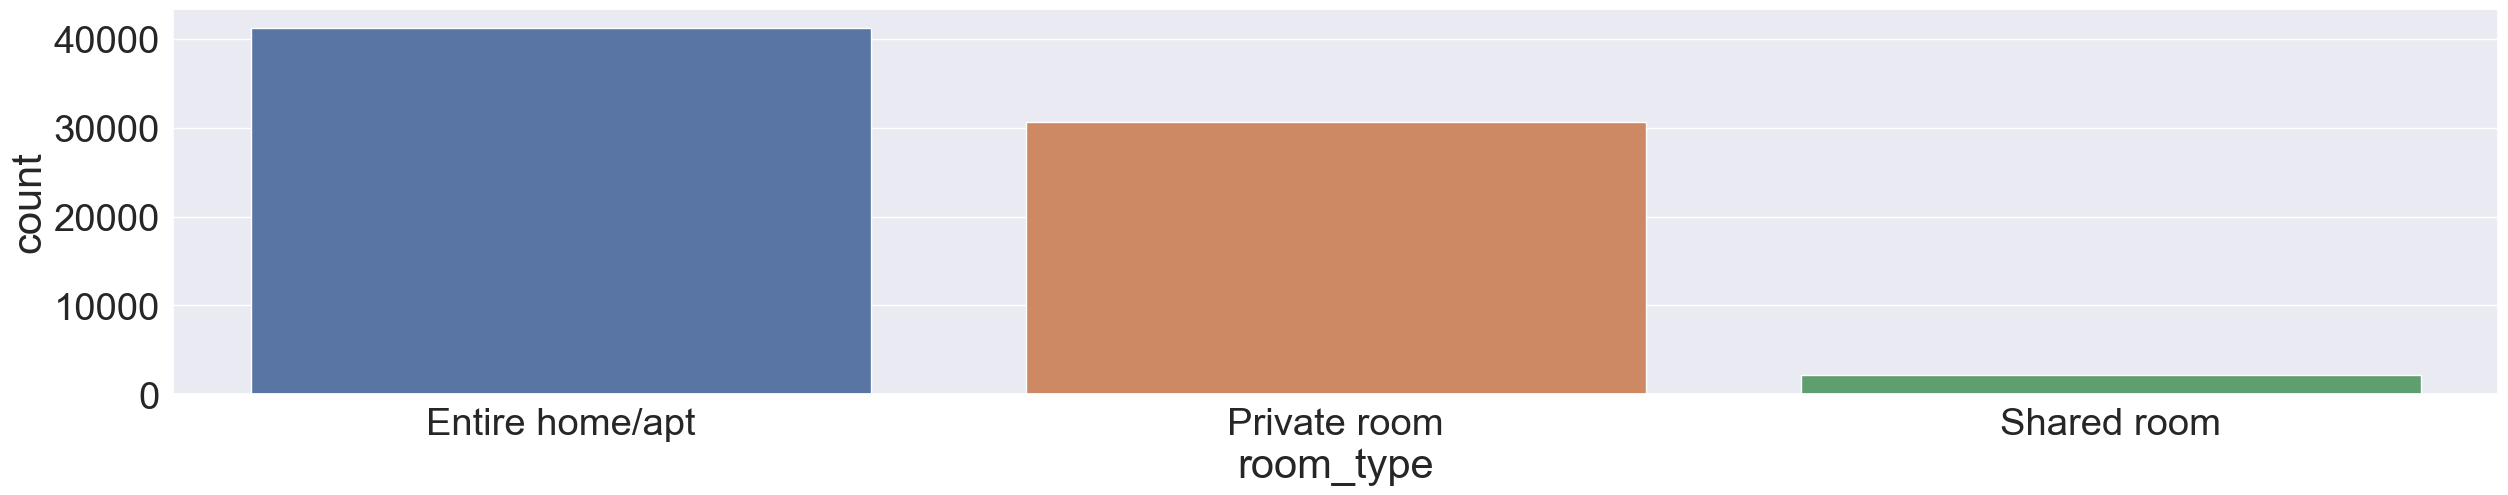

In [36]:
categorical_valcount("room_type")

Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: bed_type, dtype: int64


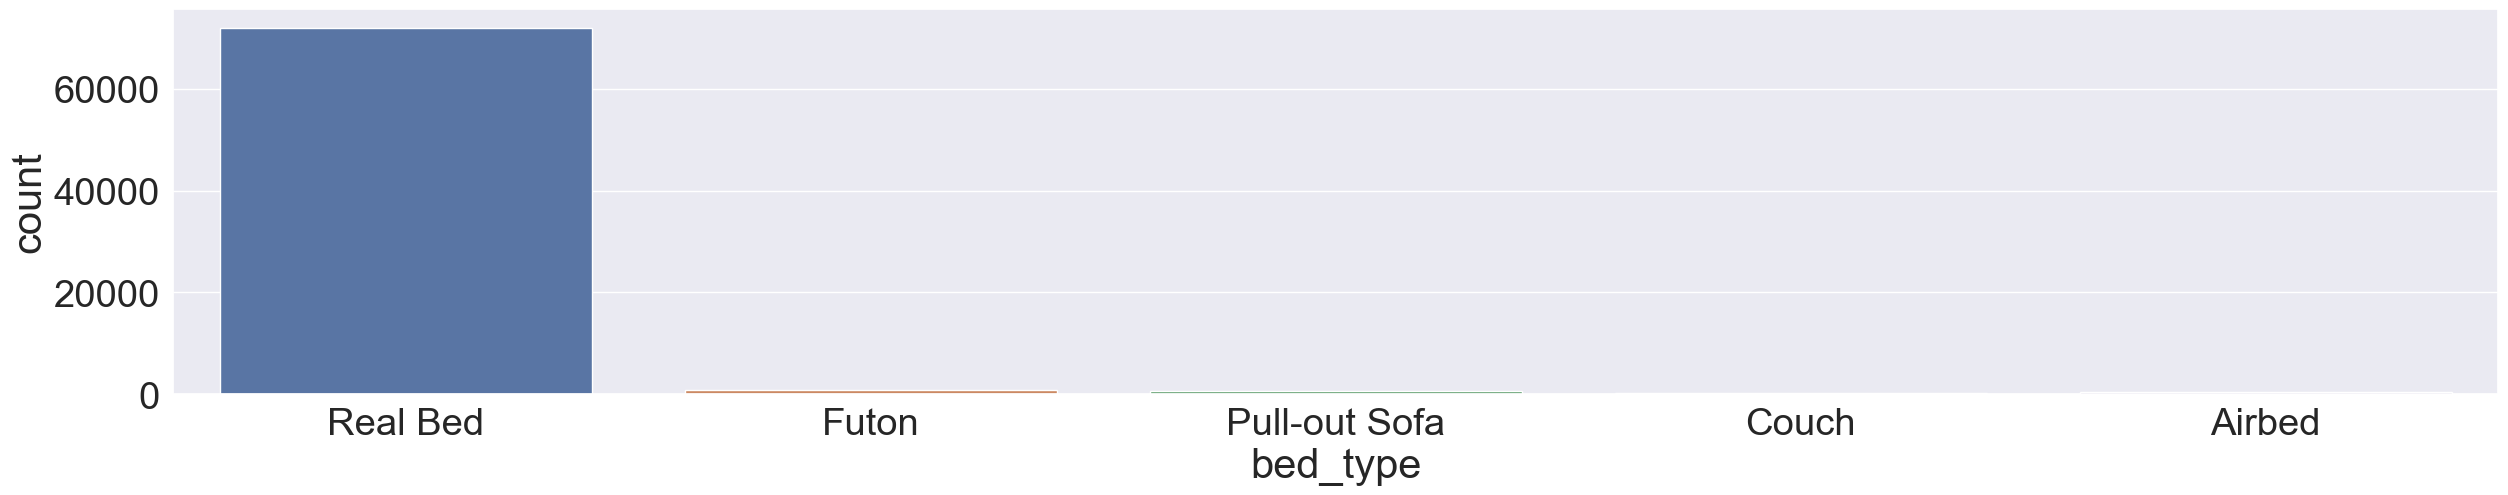

In [37]:
categorical_valcount("bed_type")

strict             32374
flexible           22545
moderate           19063
super_strict_30      112
super_strict_60       17
Name: cancellation_policy, dtype: int64


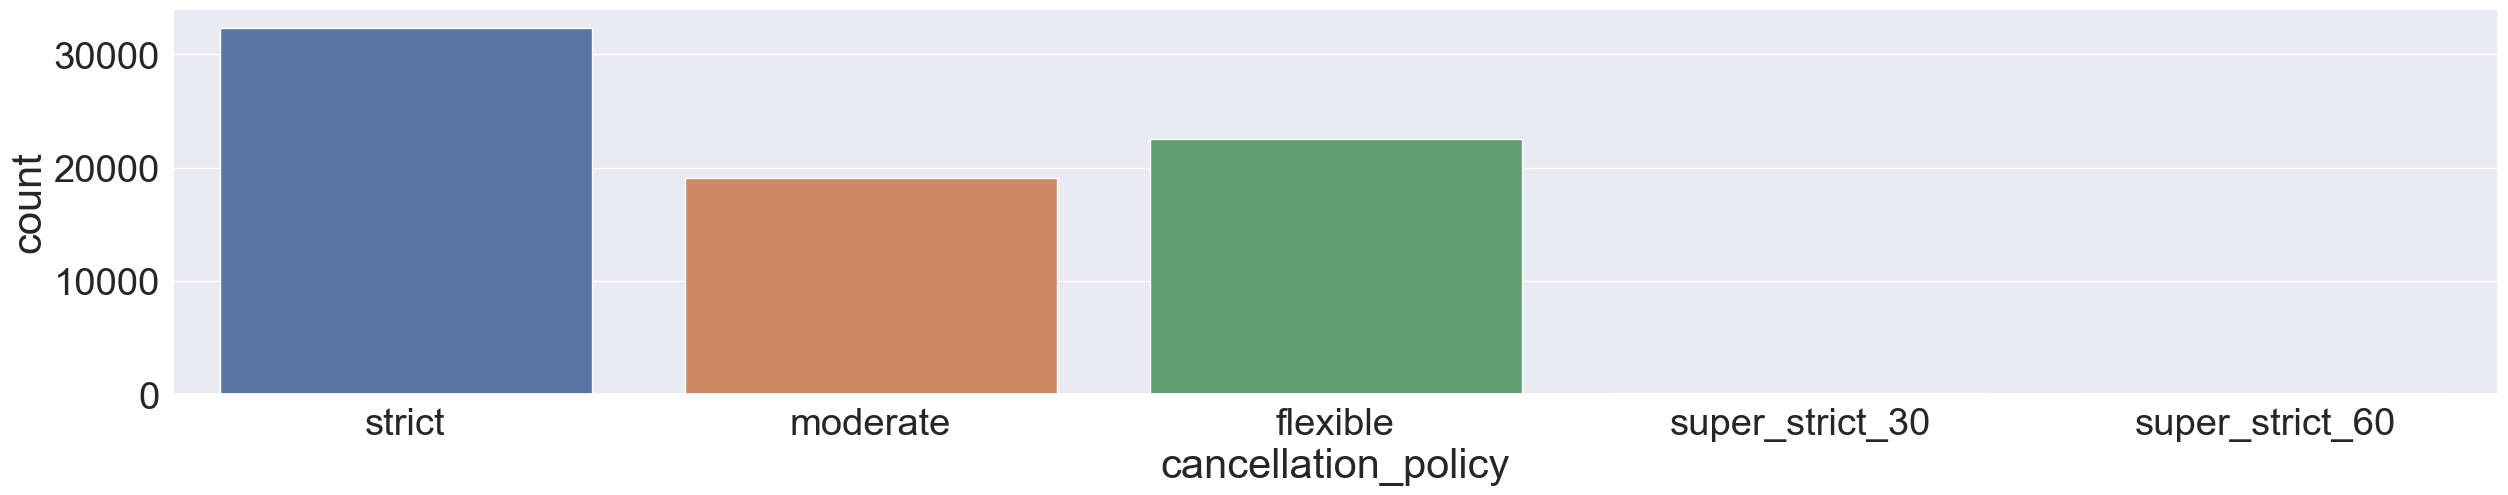

In [38]:
categorical_valcount("cancellation_policy")

Text(0.5, 1.0, 'property Type vs Price')

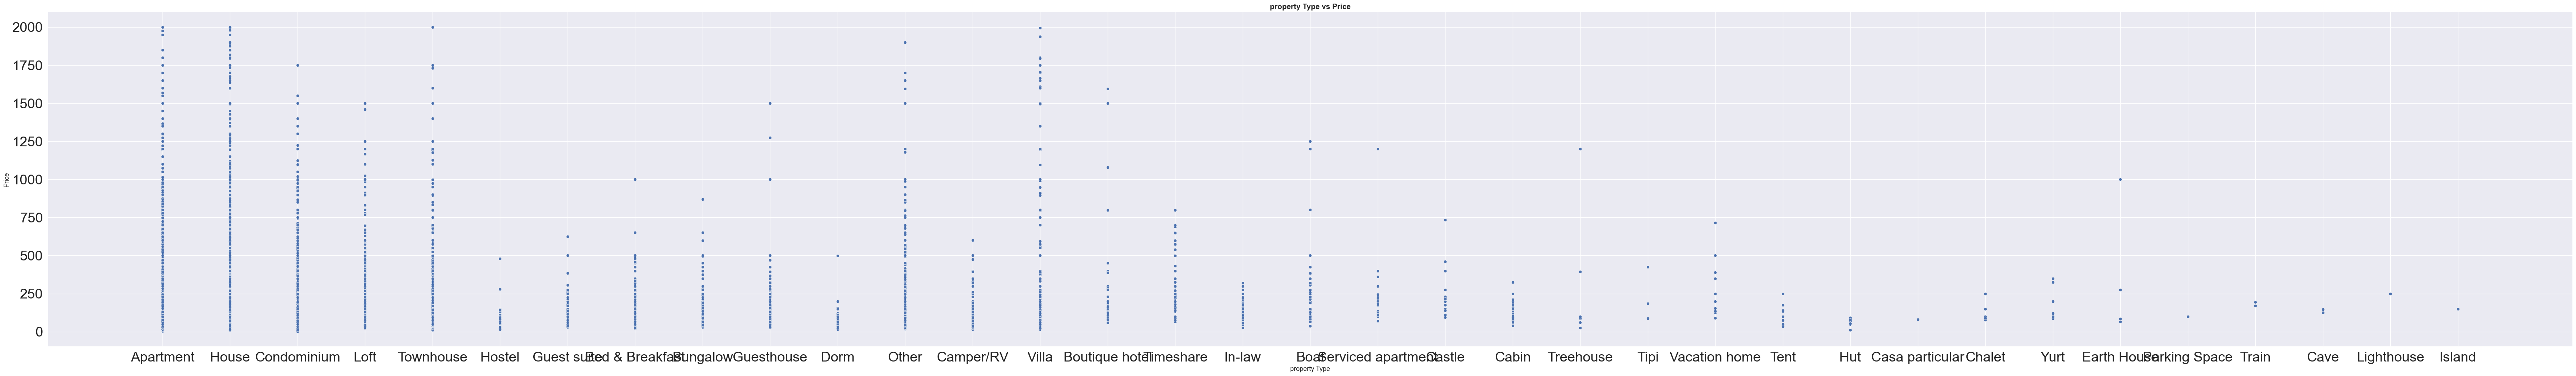

In [39]:
plt.figure(figsize=(90,12))
sns.scatterplot(x='property_type', y='price', data=df)

plt.xlabel("property Type", size=13)
plt.ylabel("Price", size=13)
plt.title("property Type vs Price",size=15, weight='bold')

In [40]:

df[['property_type', 'price']].groupby(['property_type'], as_index=False).mean().sort_values(by='price',ascending=False).head(n=10)

,property_type,price
33,Villa,383.687151
13,Earth House,356.250000
27,Timeshare,310.454545
31,Treehouse,279.142857
32,Vacation home,277.000000
8,Castle,256.076923
2,Boat,252.246154
21,Lighthouse,250.000000
28,Tipi,232.333333
25,Serviced apartment,224.142857


 Grouping the data with respect property_type so we get to know that Villa is the expensive one of all.

In [41]:
df[['city', 'price']].groupby(['city'], as_index=False).mean().sort_values(by='price',ascending=False)

,city,price
5,SF,227.372552
2,DC,217.933368
0,Boston,165.631488
3,LA,155.388233
4,NYC,143.024576
1,Chicago,132.476472


Grouping the data with respect to city and by this we got to know that Sanfransico is the most expensive one.


## **Data Encoding and Analysis**

#### Applying Encoding to Categorical Features

In [42]:
# Tranformation phase 3.print ('Printing df onehot encoding.\n\n')
print ('Shape: ' + str(df.shape))
print (df.head())
print ('\n\n')
# 1. OneHot encoding of categorical columns.
df = pd.get_dummies(df, columns=categorical_cols)

Shape: (74111, 17)
  property_type        room_type  accommodates  bathrooms  bed_type  \
0     Apartment  Entire home/apt           3.0        1.0  Real Bed   
1     Apartment  Entire home/apt           7.0        1.0  Real Bed   
2     Apartment  Entire home/apt           5.0        1.0  Real Bed   
3         House  Entire home/apt           4.0        1.0  Real Bed   
4     Apartment  Entire home/apt           2.0        1.0  Real Bed   

  cancellation_policy  cleaning_fee city host_has_profile_pic  \
0              strict          True  NYC                    t   
1              strict          True  NYC                    t   
2            moderate          True  NYC                    t   
3            flexible          True   SF                    t   
4            moderate          True   DC                    t   

  host_identity_verified instant_bookable  number_of_reviews  \
0                      t                f                2.0   
1                      f           

In [43]:
print(df.head())

   accommodates  bathrooms  cleaning_fee  number_of_reviews  \
0           3.0        1.0          True                2.0   
1           7.0        1.0          True                6.0   
2           5.0        1.0          True               10.0   
3           4.0        1.0          True                0.0   
4           2.0        1.0          True                4.0   

   review_scores_rating  bedrooms  beds  price  Number of amenities  \
0                 100.0       1.0   1.0  150.0                  9.0   
1                  93.0       3.0   3.0  169.0                 15.0   
2                  92.0       1.0   3.0  145.0                 19.0   
3                  96.0       2.0   2.0  750.0                 15.0   
4                  40.0       0.0   1.0  115.0                 12.0   

   property_type_Apartment  ...  city_NYC  city_SF  \
0                        1  ...         1        0   
1                        1  ...         1        0   
2                        1  ... 

Label Encoding successfully applied, we can see additional columns added below

### Train, Test and Split the Data

In [44]:
# Divide the data into training and test sets.
x = df.drop(['price'], axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
numerical_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
print ('Training features.\n\n')
print ('Shape: ' + str(x_train.shape))
print (x_train.head())
print ('\n\n')
print ('Training target.\n\n')
print ('Shape: ' + str(y_train.shape))
print (y_train.head())
print ('\n\n')
print ('Testing features.\n\n')
print ('Shape: ' + str(x_test.shape))
print (x_test.head())
print ('\n\n')
print ('Testing target.\n\n')
print ('Shape: ' + str(y_test.shape))
print (y_test.head())
print ('\n\n')

Training features.


Shape: (59288, 70)
       accommodates  bathrooms  cleaning_fee  number_of_reviews  \
12048           4.0        1.5         False               12.0   
48255           2.0        1.0          True                6.0   
39959           4.0        1.0          True                4.0   
14926           2.0        1.0          True                0.0   
776             3.0        1.0          True               16.0   

       review_scores_rating  bedrooms  beds  Number of amenities  \
12048                  97.0       2.0   3.0                 17.0   
48255                  87.0       1.0   1.0                 18.0   
39959                  80.0       0.0   2.0                 11.0   
14926                  96.0       1.0   1.0                  1.0   
776                    99.0       1.0   1.0                 13.0   

       property_type_Apartment  property_type_Bed & Breakfast  ...  city_NYC  \
12048                        0                              0  ...  

## **Linear Regression**

In [45]:
# Training a linear regression model.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [47]:

print(f'Root Mean Squared Error TEST: {rmse:.2f}')
print(f'R-squared TEST: {r2:.2f}')

Root Mean Squared Error TEST: 131.08
R-squared TEST: 0.41


In [48]:
y_pred_train = model.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print(f'Root Mean Squared Error TRAIN: {rmse_train:.2f}')
print(f'R-squared TRAIN: {r2_train:.2f}')

Root Mean Squared Error TRAIN: 127.53
R-squared TRAIN: 0.42


##  Random forest with hypertuning:

In [50]:
rf_model = RandomForestRegressor(random_state=42)


In [51]:
# # Hyperparameter tuning using GridSearchCV
# Define the hyperparameters and ranges for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


In [52]:
# Randomized search with cross-validation
grid_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
                            n_iter=10, scoring='neg_mean_squared_error', 
                            cv=5, verbose=1, random_state=42, n_jobs=-1)



In [53]:
# Fit the model using RandomizedSearchCV
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/kritisonal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kritisonal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kritisonal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [54]:
# Get the best hyperparameters
best_params = grid_search.best_params_


In [55]:
# Predictions on the test set using the best model
#best_model = grid_search.best_estimator_
#predictions = best_model.predict(x_test)


In [56]:
# Use the best hyperparameters to create the final model
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(x_train, y_train)


RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=300, random_state=42)

In [57]:
# Make predictions on test set
y_predictions_test = best_rf_model.predict(x_test)
y_predictions_train = best_rf_model.predict(x_train)


In [58]:
# Calculate metrics
rmse_test = sqrt(mean_squared_error(y_test, y_predictions_test))
r2_test = r2_score(y_test, y_predictions_test)
rmse_train = sqrt(mean_squared_error(y_train, y_predictions_train))
r2_train = r2_score(y_train, y_predictions_train)

In [59]:
# Print metrics
print("Test set:")
print(f"Root Mean Squared Error: {rmse_test}")
print(f"R-squared: {r2_test}")
print("\nTraining set:")
print(f"Root Mean Squared Error: {rmse_train}")
print(f"R-squared: {r2_train}")

Test set:
Root Mean Squared Error: 120.80971776760148
R-squared: 0.5016375436851881

Training set:
Root Mean Squared Error: 81.35765124773334
R-squared: 0.7652969738715331


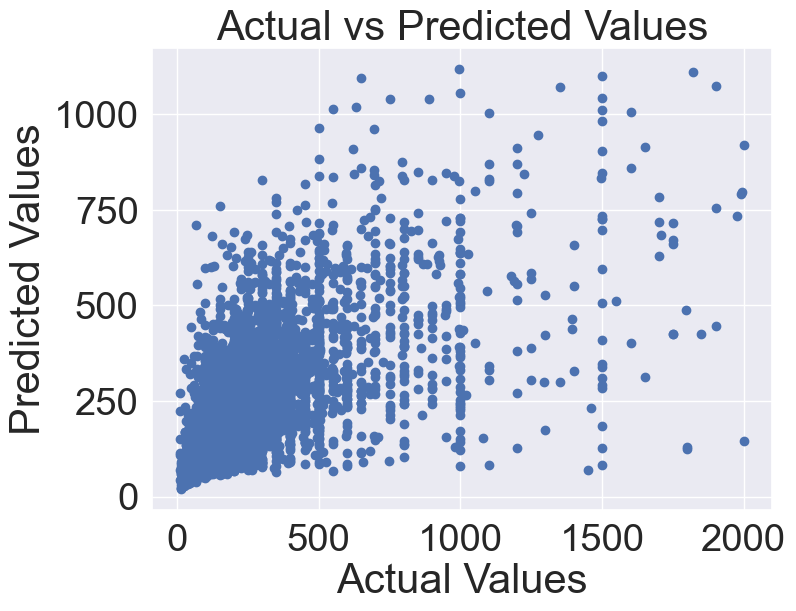

In [61]:
# Creating a scatter plot of predicted vs actual values
#This plot helps to visualize how well the predicted values align with the actual values. 
#In a perfect prediction scenario, all points would lie on a straight line (y = x). The deviation from this line indicates the model's prediction errors. 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predictions_test)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

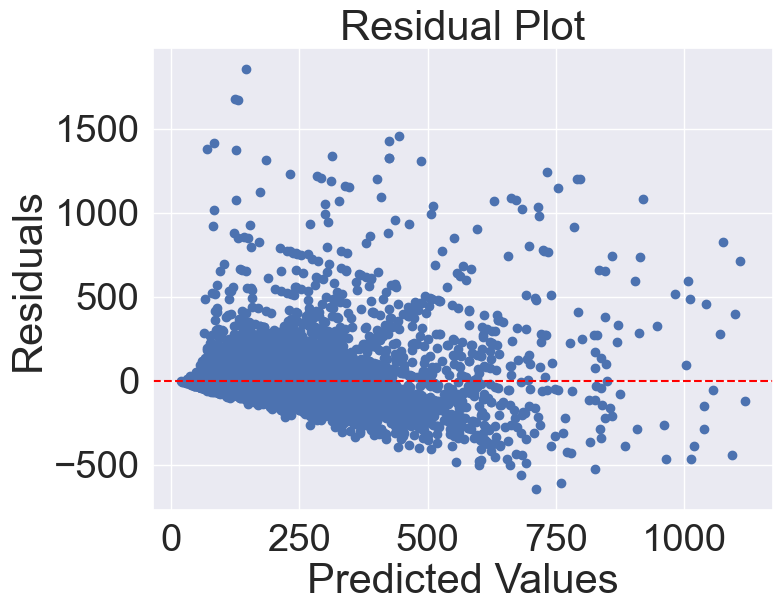

In [65]:
#Residual plot by plotting the differences between actual and predicted values against the predicted values.
#This helps to visualize if there's any pattern in the model's errors.
plt.figure(figsize=(8, 6))
plt.scatter(y_predictions_test, y_test - y_predictions_test)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Adding a horizontal line at y=0 for reference
plt.show()

### K nearest Neighbors

 Import KNN model and begin with a trail value for K around 11

In [66]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [67]:
# Create KNN regressor model
k = 11  #adjust the number of neighbors (k) based on your preference
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=11)

In [68]:
y_pred_test = knn_model.predict(X_test_scaled)
y_pred_train = knn_model.predict(X_train_scaled)

In [69]:

# Evaluate the model for TEST
rmse = sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f'Root Mean Squared Error TEST (RMSE): {rmse:.2f}')
print(f'R-squared TEST(R2): {r2:.2f}')

Root Mean Squared Error TEST (RMSE): 128.73
R-squared TEST(R2): 0.43


In [70]:

# Evaluate the model for Train
rmse = sqrt(mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)

In [71]:

print(f'Root Mean Squared Error TRAIN (RMSE): {rmse:.2f}')
print(f'R-squared TEST(R2): {r2:.2f}')

Root Mean Squared Error TRAIN (RMSE): 113.26
R-squared TEST(R2): 0.55


In [72]:
# Create a KNN Regressor
knn_regressor = KNeighborsRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': np.arange(1, 20),  # Range of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2],  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model with the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Display the best parameters and evaluation metric
print("Best Parameters:", best_params)
print("\nMean Squared Error: {:.2f}".format(mse))

KeyboardInterrupt: 

In [73]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 131.08400415608108
R-squared: 0.4132663769419396


In [74]:
#Comparing all the models - rmse:

In [75]:
d = {
    "Linear Regression": ["{:.2f}".format(rmse_train),"{:.2f}".format(rmse_train)],
    "Random Forest": [r2_train,r2_test ],
    #"KNN": [dtc_train_score, dtc_test_score],
    
}
allmodelsdf = pd.DataFrame(d)
allmodelsdf.index = ["Train Accuracy", "Test Accuracy"]

In [81]:
d = {
    "Linear Regression": [r2_train,r2],
    "Random Forest": [r2_train,r2_test ],
    #"KNN": [dtc_train_score, dtc_test_score],
    
}
allmodelsdf = pd.DataFrame(d)
allmodelsdf.index = ["Train Accuracy", "Test Accuracy"]

In [82]:
allmodelsdf

,Linear Regression,Random Forest
Train Accuracy,0.765297,0.765297
Test Accuracy,0.413266,0.501638


In [77]:
print(f'Root Mean Squared Error TRAIN: {rmse_train:.2f}')
print(f'R-squared TRAIN: {r2_train:.2f}')

Root Mean Squared Error TRAIN: 81.36
R-squared TRAIN: 0.77


In [78]:

print(f'Root Mean Squared Error TRAIN: {rmse_train:.2f}')
print(f'R-squared TRAIN: {r2_train:.2f}')

Root Mean Squared Error TRAIN: 81.36
R-squared TRAIN: 0.77


In [79]:
print(f'Root Mean Squared Error TEST: {rmse:.2f}')
print(f'R-squared TEST: {r2:.2f}')

Root Mean Squared Error TEST: 131.08
R-squared TEST: 0.41
